# Lab 1 Report: 
## Data Preparation Techniques for Machine Learning

### Name: Zachary Banken

In [3]:
# Import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from IPython.display import Image # For displaying images in colab jupyter cell

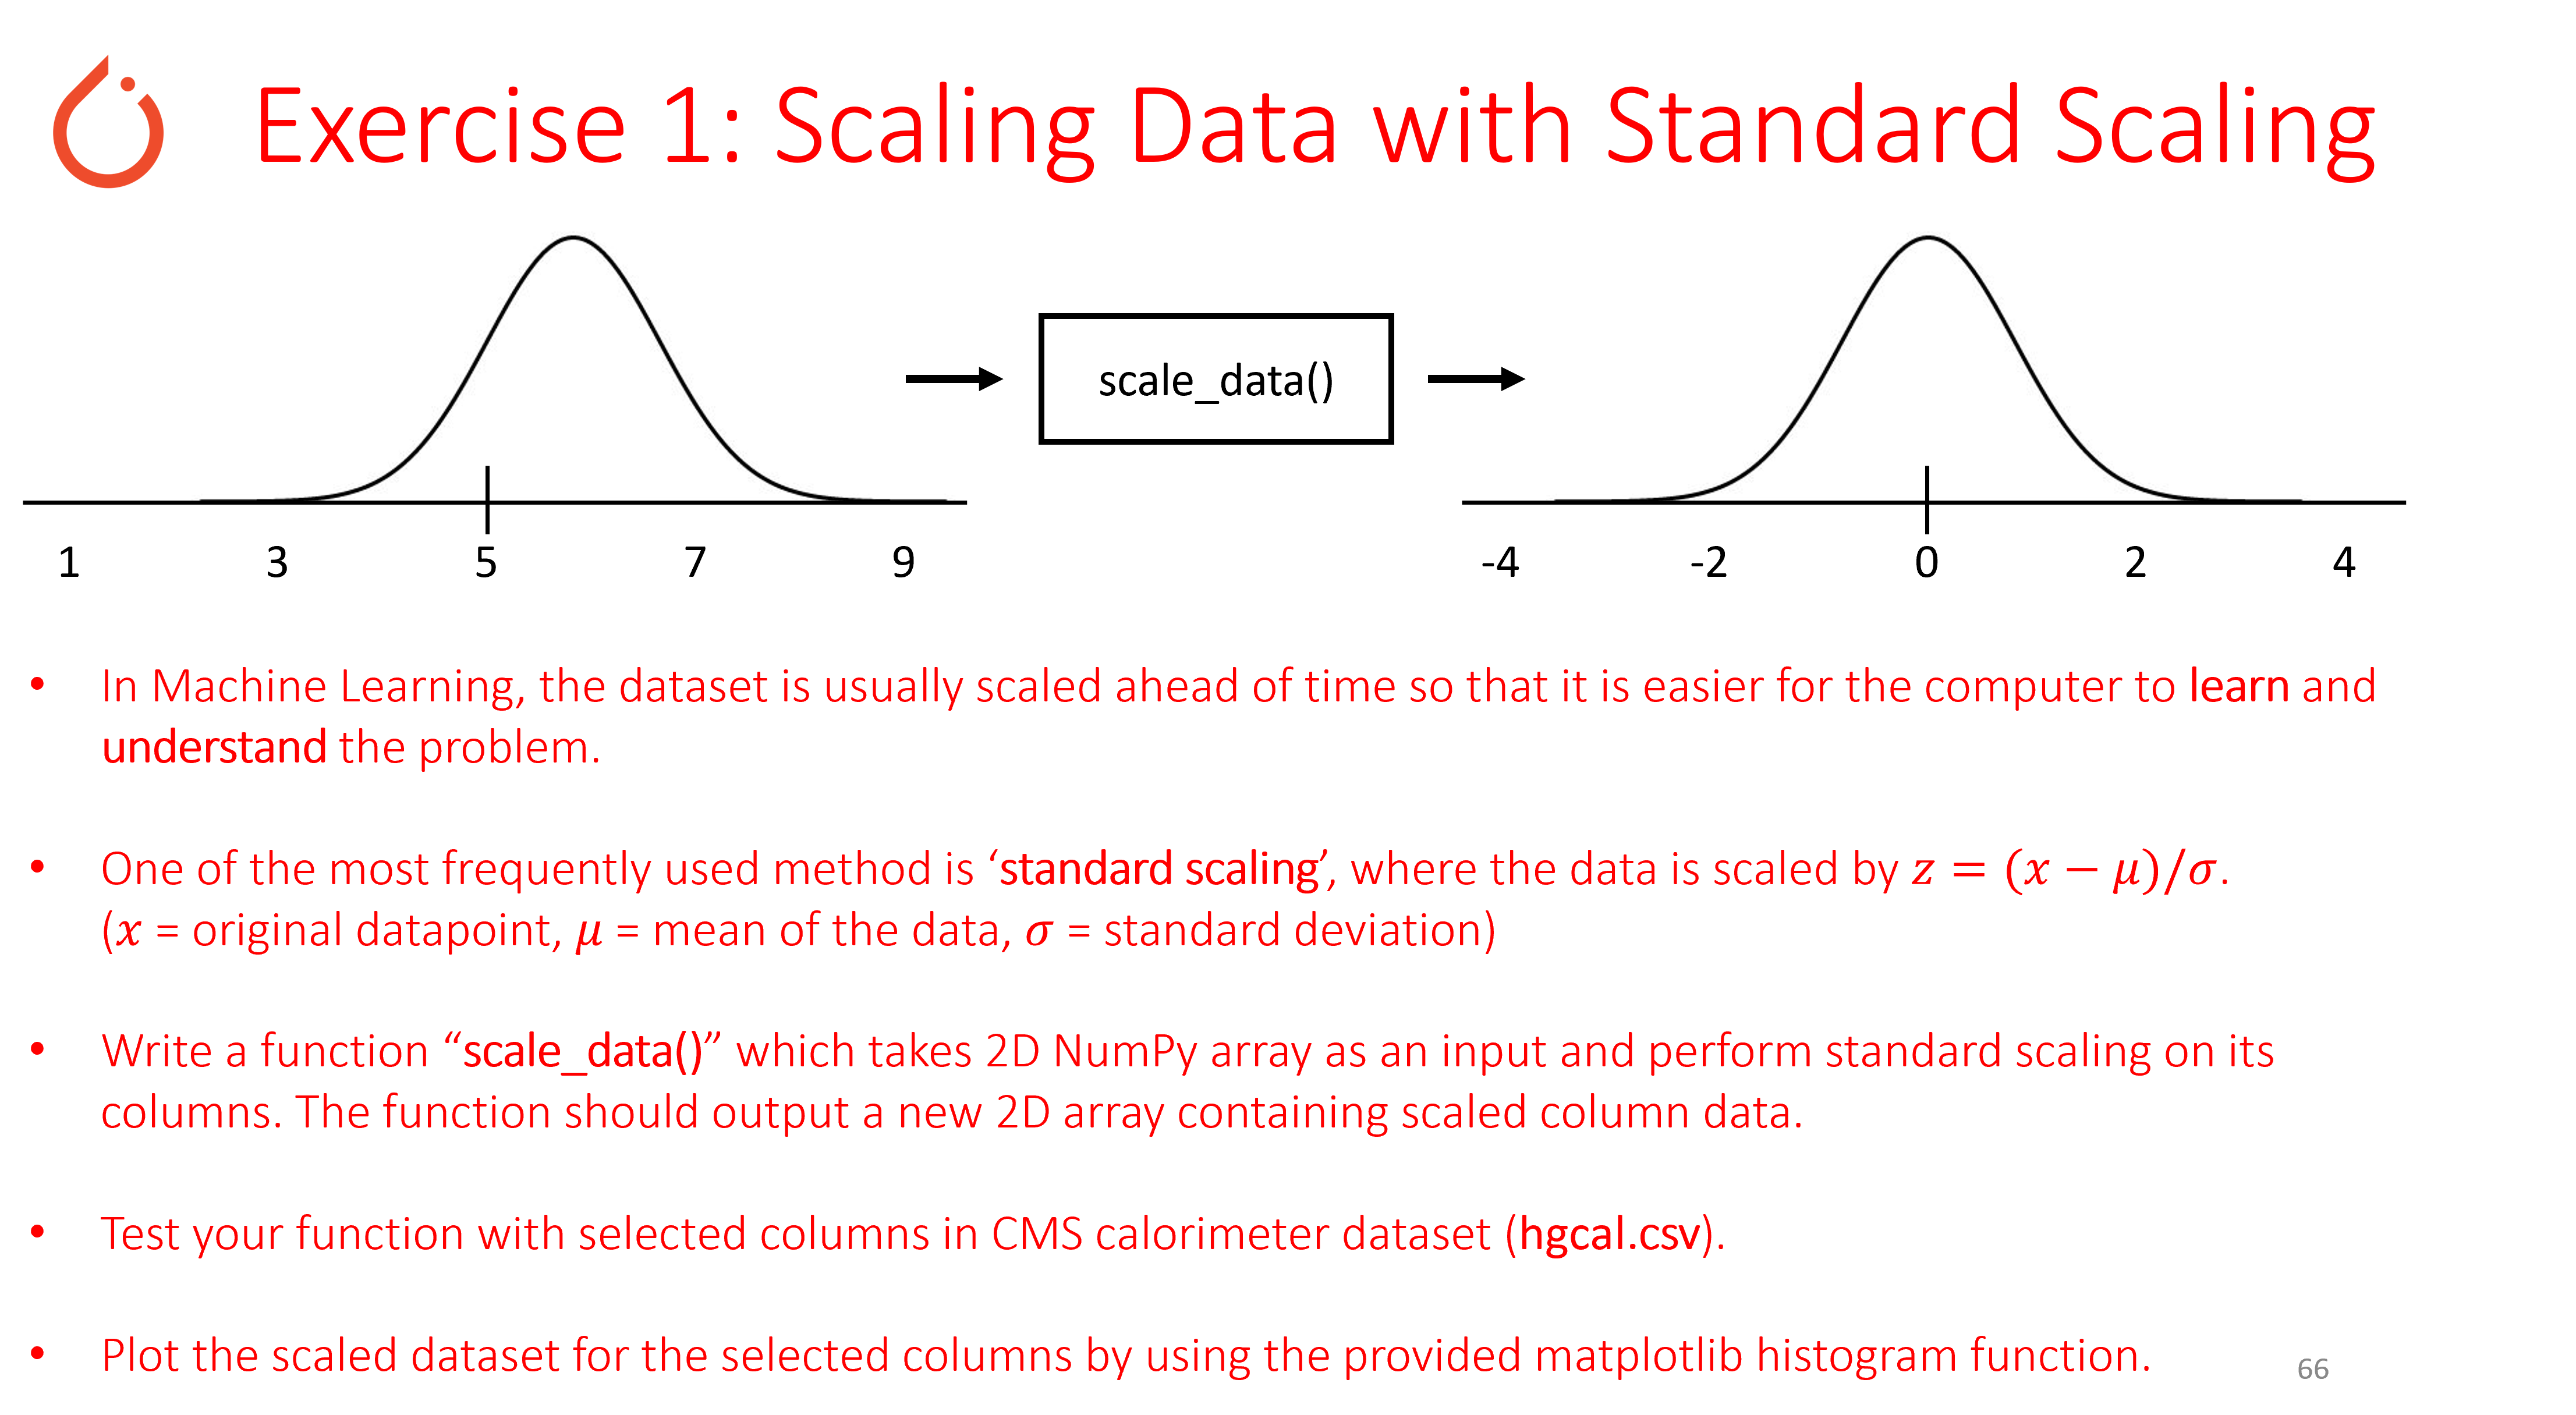

In [7]:
Image('lab1_exercise1.PNG', width = 1000)

In [8]:

# Testing out stacking arrays

# Make two arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Stack them horizontally
print(np.hstack((a,b)))

# Stack them vertically
print(np.vstack((a,b)))

# Concatenate them
print(np.concatenate((a,b)))


[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [9]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)

,Unnamed: 0,x,y,z,eta,phi,energy,trackId
0,0,179.50383,-23.632137,-7.878280,-0.0435,-0.130900,0.200126,462412
1,1,-143.63881,110.217940,-72.706795,-0.3915,2.487094,2.734594,493395
2,2,179.50383,-23.632120,-146.429610,-0.7395,-0.130900,0.423910,1
3,3,-172.67310,54.443620,-238.065340,-1.0875,2.836160,0.713950,493640
4,4,-180.88046,7.897389,-238.065340,-1.0875,3.097959,0.000000,495225
5,5,-180.88045,-7.897438,-238.065340,-1.0875,-3.097959,0.034491,495225
6,6,-152.69838,-97.279590,-265.020540,-1.1745,-2.574361,0.580138,460126
7,7,-23.63213,179.503810,-325.172060,-1.3485,1.701696,0.411487,465028
8,8,-152.69835,97.279594,89.977780,0.4785,2.574361,0.183141,1383
9,9,-176.76110,39.187016,107.930240,0.5655,2.923426,0.337551,4421


In [10]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [11]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub. 
# The array should have dimension 420 (rows) x 6 (columns)

CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7]  # 1:7 means 1, 2, 3, 4, 5, 6

print(CMS_calori_dataset_np_sub.shape)


(420, 6)
(2520,)


In [147]:
# Create the scaling function

def scale_data(arr):
    mu = np.mean(arr, axis = 0)
    sigma = np.std(arr, axis = 0)
    arr = (arr - mu)/sigma
    return arr

In [148]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

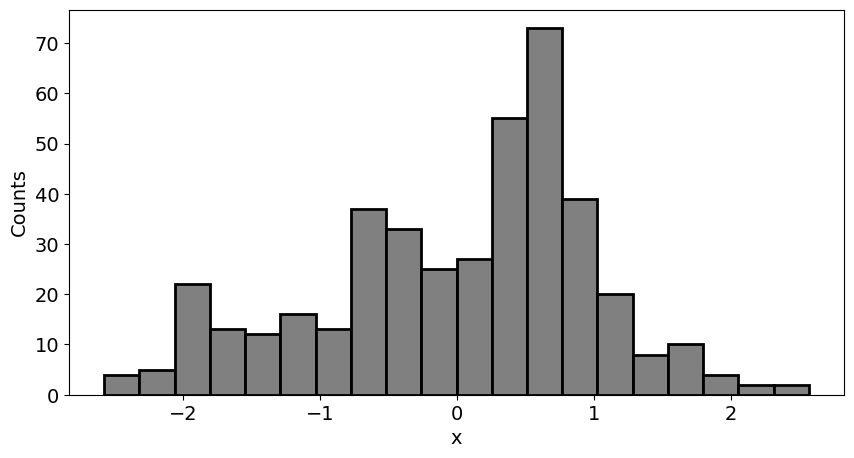

In [149]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

plt.xlabel('x', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.show()

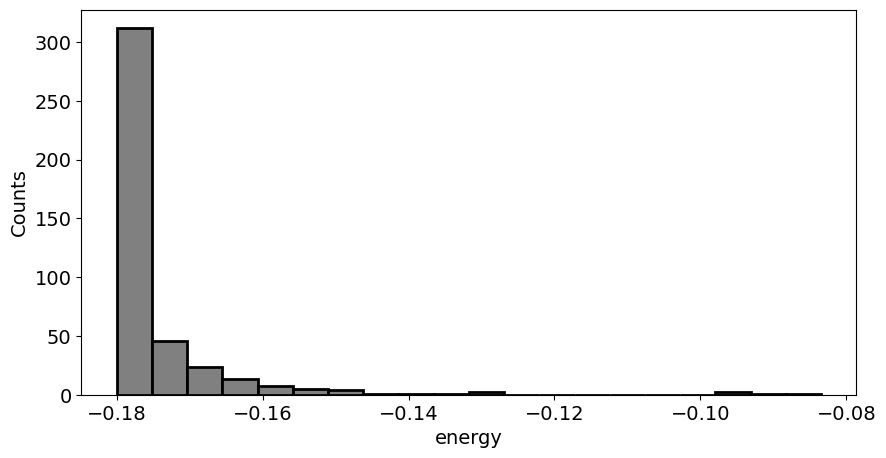

In [15]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

plt.xlabel('energy', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.show()

### Expected histogram outputs - Feel free to style your plot differently

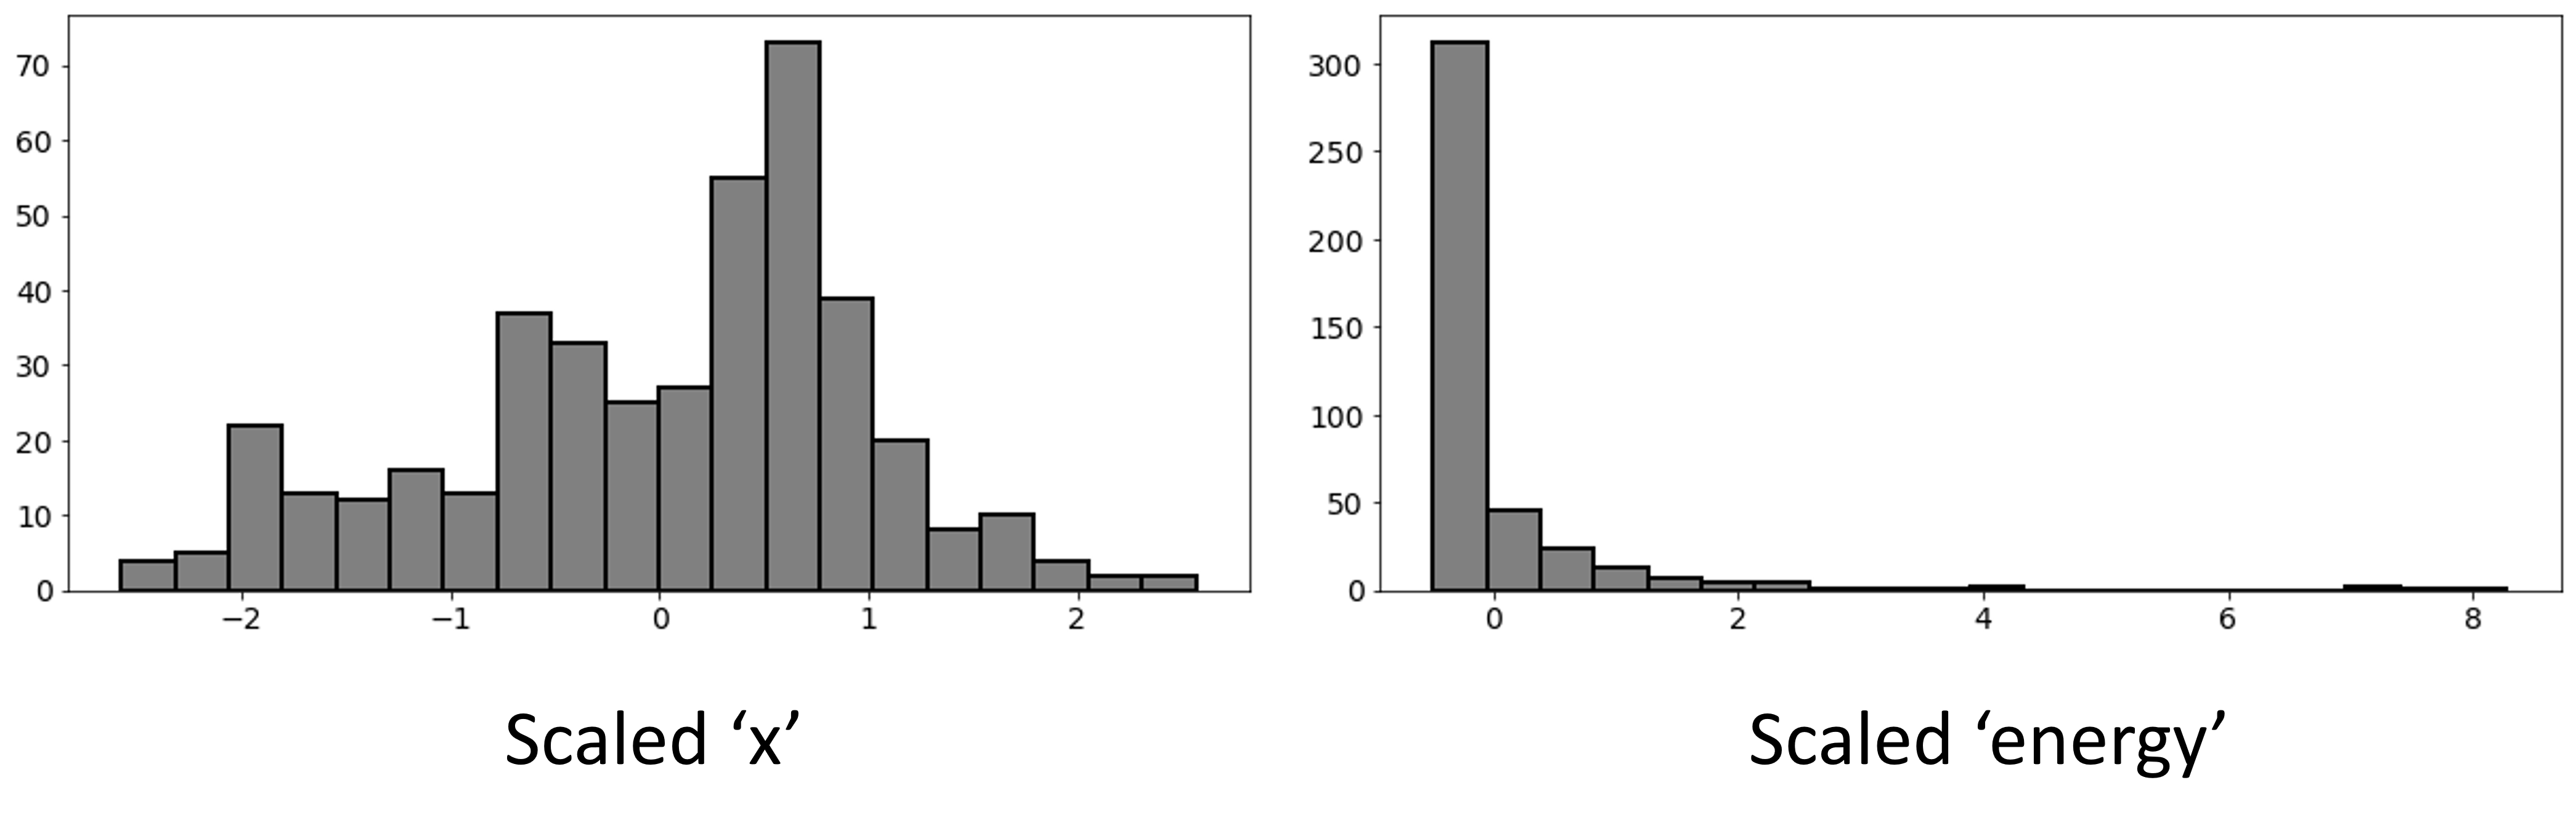

In [4]:
Image('lab1_e1_expected_outputs.PNG', width = 1000)

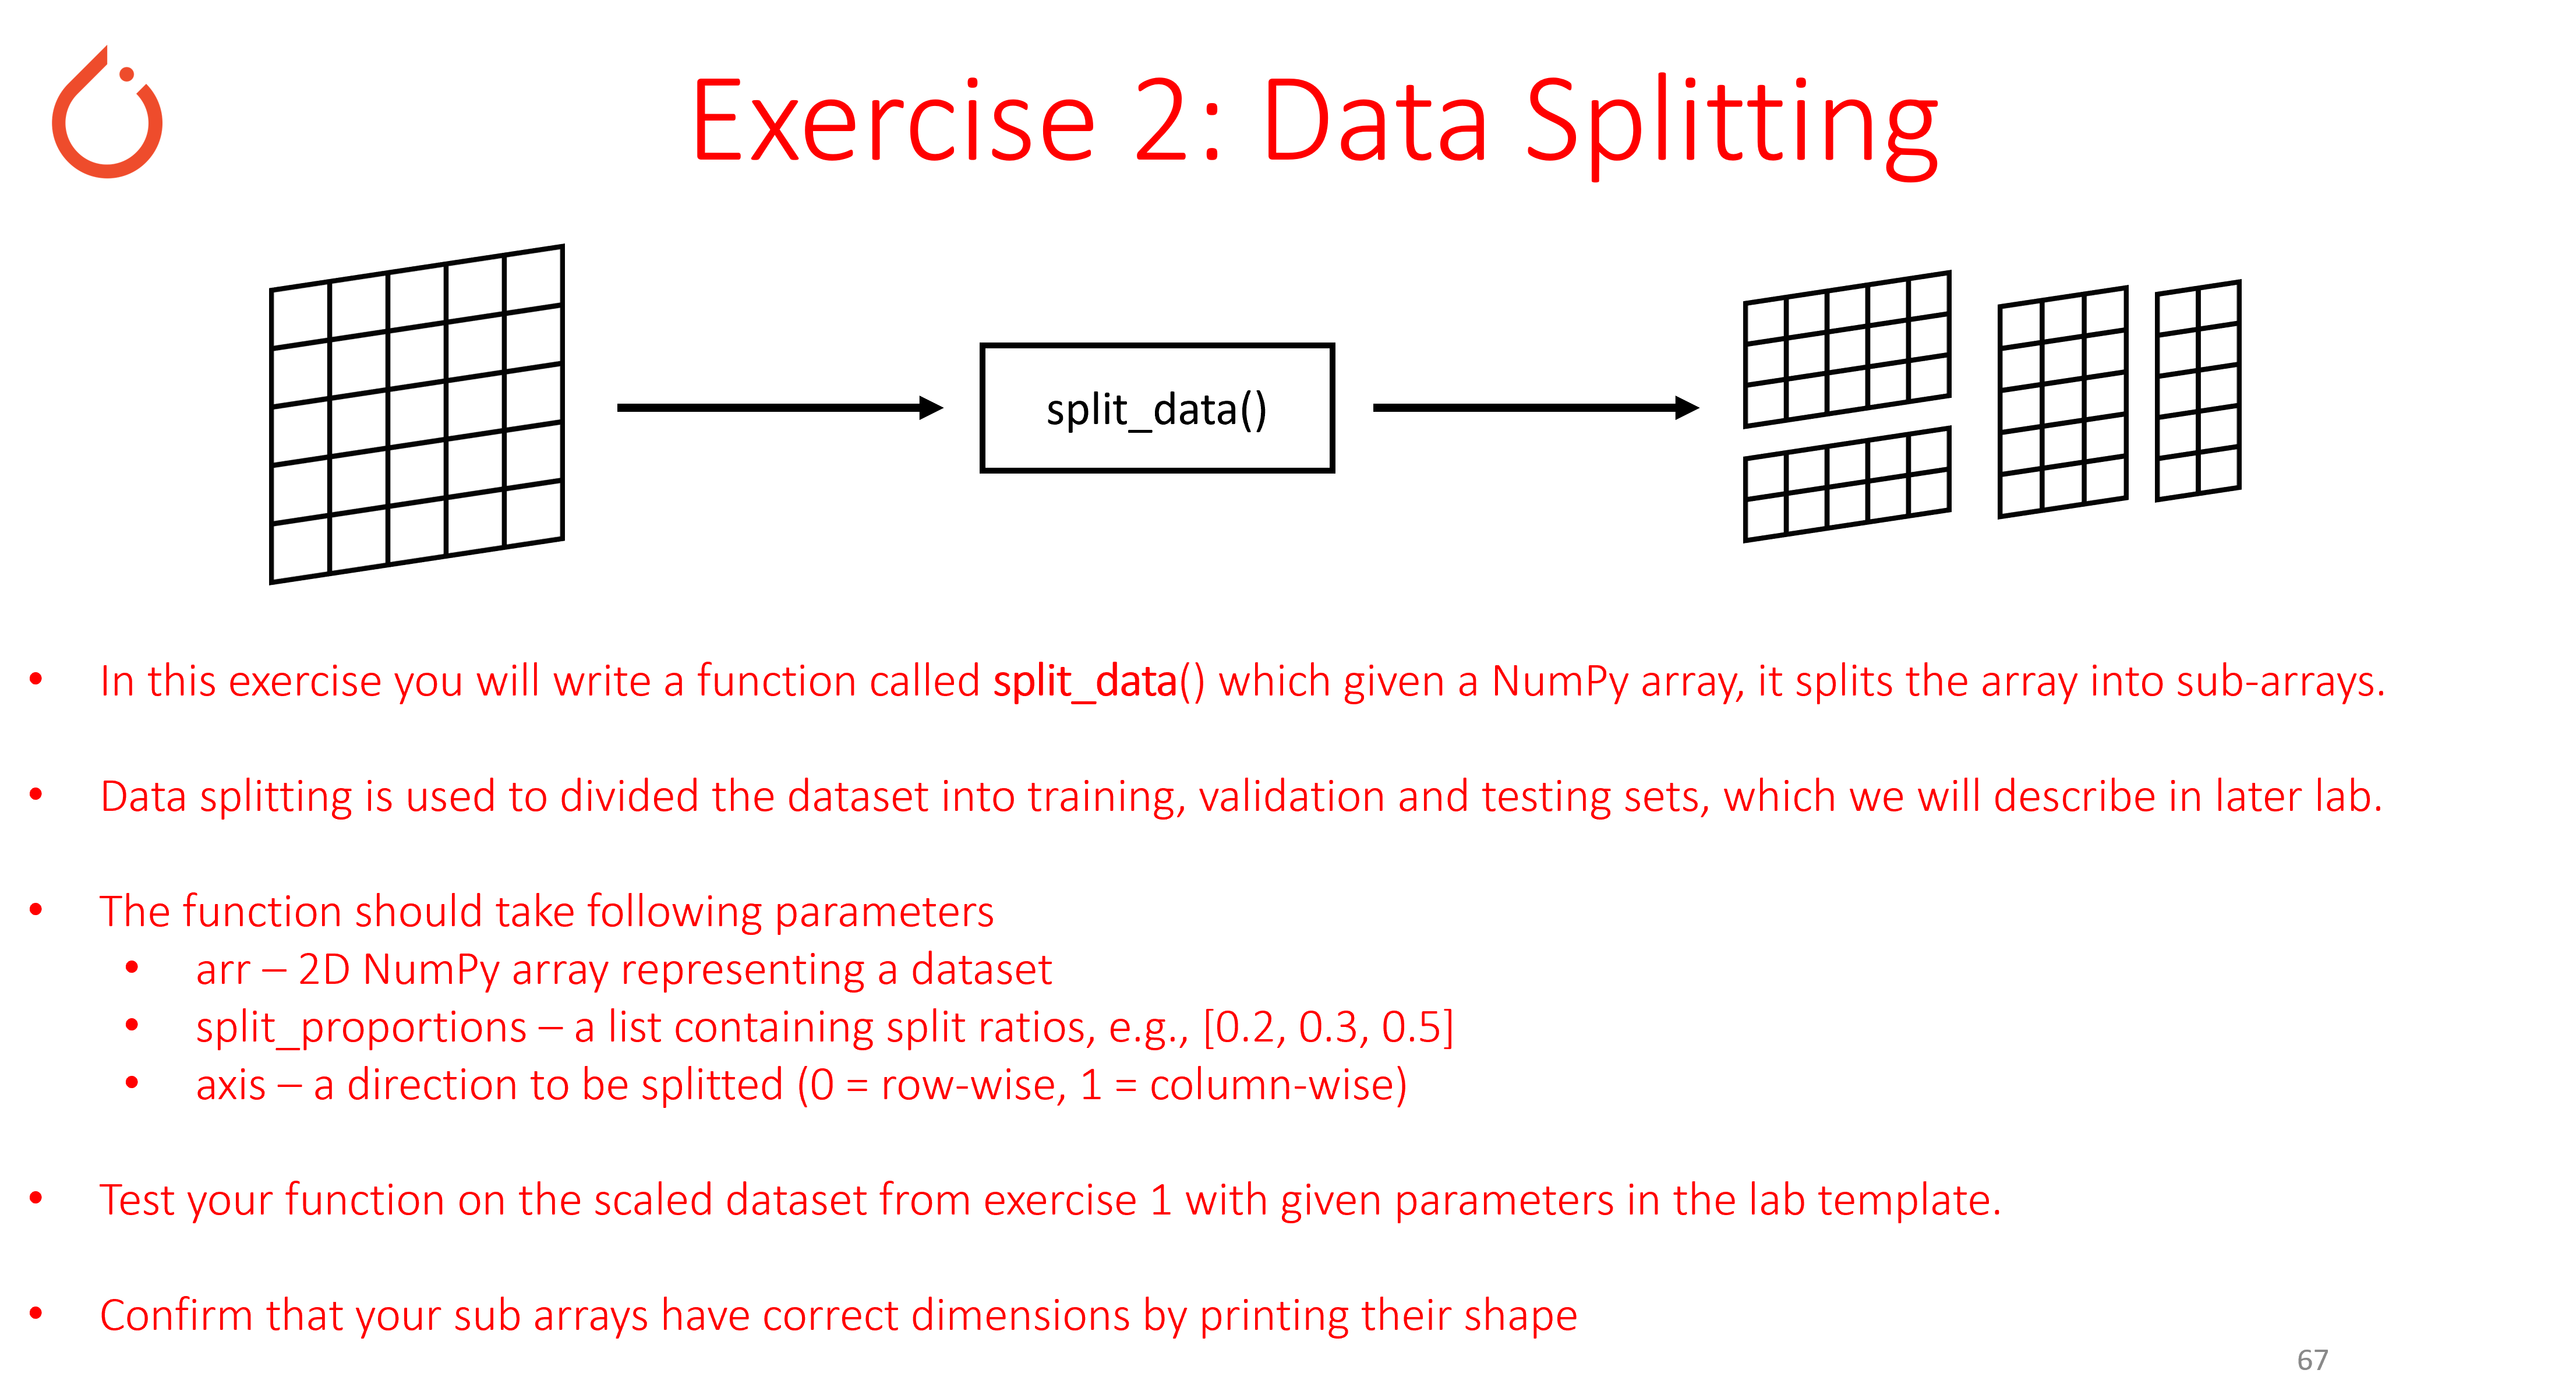

In [3]:
Image('lab1_exercise2.PNG', width = 1000)

In [141]:
# Create the splitting function

def split_data(arr, split_proportions, axis):
    
    # YOUR CODE HERE
    # numpy split will split along indices, so we need to convert a fraction into an index, 
    # then split along the cumulative sum of these indices. The last fraction is not used since we are splitting between indices.
    split_indices = np.cumsum((np.array(split_proportions)[:-1] * (arr.shape[axis])).astype(int))
    print(split_indices)
    split_data_list = np.split(arr, split_indices, axis=axis)

    return split_data_list

split_proportions = [0.2,0.2,0.6]


In [142]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1
print(CMS_calori_dataset_np_sub_scaled)
sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, split_proportions = [0.6, 0.2, 0.2], axis = 0)

[[ 0.89789577 -0.32191238 -0.22731228 -0.18026533 -0.18079015 -0.17880238]
 [-1.04253867  0.48184196 -0.61660007 -0.18235503 -0.1650694  -0.16358319]
 [ 0.89789577 -0.32191228 -1.0592971  -0.18444473 -0.18079015 -0.17745858]
 ...
 [-0.39434661 -0.48611695  2.95933783 -0.16304031 -0.19310474 -0.17681204]
 [-0.27672342 -0.54096553  2.95933783 -0.16304031 -0.19100864 -0.1791499 ]
 [ 0.1809573  -0.27672335  2.95933783 -0.16304031 -0.18157619 -0.16743752]]
[252 336]


In [143]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [144]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1
print(CMS_calori_dataset_np_sub_scaled.shape)
sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                                split_proportions = [0.5, 0.5], axis = 1)

(420, 6)
[3]


In [145]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)
